# Importing Libraries

In [2]:
# importing the librariers needed to execute the process

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import random
from numpy import inf
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import binom
import time

import pandas as pd



# Save the distribution images in below mentioned folder

In [3]:
import os
desired_folder = 'C:\\Users\\H370546\\Downloads\\Images-task2\\'

# Main Functioning of the game
 
 The aim of the game is to reach the shortest path in a N * N matrix starting from 0. 
 there are two game modes to the executing the program to find the shortest path 
 
 
 Assumption - Game starts from 1,1 and destination is n,n 
 
 Game Mode 1 : The time spent on a cell is the number on x, y cell
 
 
 Game Mode 2: The time spent on a cell is the absolute of the difference between the previous cell the  agent was on and the   current cell it is on 

In [4]:


class solvingMaze:
    
    def showmatrix(self, numberofRows):
        self.numberofRows = numberofRows
        
        #data = np.random.seed(numberofRows)
        data = np.random.randint(numberofRows, size = (numberofRows,numberofRows))
        #Keep the numbers constant

        print("visualize matrix with Random Number",data)
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(data, cmap=mpl.colors.ListedColormap(['white','grey',"silver"]))

        for (i, j), z in np.ndenumerate(data):
            ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

        plt.show()
        return data, numberofRows
   

    def visualizepath(self, path):
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(path, cmap=mpl.colors.ListedColormap(['white','grey']))

        for (i, j), z in np.ndenumerate(path):
            ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
        
        name=str("Maze")+"_"+str(numberofRows)
        full_path = os.path.join(desired_folder, name)
        plt.savefig(name)

        plt.show()


#  Heuristic Algorithm

 In this Algorithm, the path calculated by the algorithm in game mode 1 is to find the smaller value between cells (x +1, y) and (x, y+1). And in Game Mode2 it is the absolute difference between abs (x+1, y) – (x, y+1). The same has been illustrated in “class Heuristic” in the code. The chosen path is marked as “1” and the rest of the cells are marked as “0”.

In [5]:




# Below logic is for Heuristic Algorithm


class Heuristic:
    def heuristicpath(self,data,numberofRows,modeofGame):
        ti = time.time()
        

        path = np.zeros((numberofRows,numberofRows), dtype = np.int8)#creating a matrix of zero
        x,y = (0,0)

        cost = 0
        # we cover 2n-1 cell
        if modeofGame == 1:#mode 1  of the game
            for i in range((2 * numberofRows) - 1):
                path[x][y] = 1
                cost = cost + data[x][y]
                if x < numberofRows - 1  and y < numberofRows - 1 :  # calculating the shortest path between adjacent cells
                    if abs(data[x + 1][y]) <= abs(data[x][y + 1]):
                        x = x + 1
                    else :
                        y = y + 1
                elif x == numberofRows - 1 and y != numberofRows - 1 :
                        y = y + 1

                elif y == numberofRows - 1 and x != numberofRows -1 :
                        x = x + 1
        else:
            for i in range(2 * numberofRows -1 ):
                path[x][y] = 1
                xpre = x
                ypre = y
                # calculating the absolute shortest path between adjacent cells
                if x < numberofRows - 1  and y < numberofRows - 1 :
                    if abs(data[x + 1][y]  - data[x][y]) <= abs(data[x][y + 1] - data[x][y]):
                        x = x + 1
                    else :
                        y = y + 1
                elif x == numberofRows - 1 and y != numberofRows - 1:
                        y = y + 1

                elif y == numberofRows- 1 and x != numberofRows - 1 :
                        x = x + 1
                cost = cost + abs(data[xpre][ypre] - data[x][y])

                    
        tf = time.time()
        return path,cost,round(1000*(tf-ti),2)
        
    

In [6]:
# Below logic is for Dijikstra Algorithm for both the game modes mentioned above

class Dijikstra: 
    
    def dijkstrapath(self , matrixcomponent, numberofRows,modeofGame):
            ti = time.time()
            graph = {}
            matrix = matrixcomponent
            costs = {}
            if modeofGame == 1:
                for x in range(numberofRows):
                    for y in range(numberofRows):
                            xm1 = x - 1
                            ym1 = y - 1
                            xp1 = x + 1
                            yp1 = y + 1
                            costs[str(x) + str(y)] = inf
                            graph[str(x) + str(y)] = {}
                            above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(above[0]) == False:
                                graph[str(x) + str(y)][str(xm1) + str(y)] = matrix[xm1][y]
                            below = np.array((xp1, y)) if xp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(below[0]) == False:
                                graph[str(x) + str(y)][str(xp1) + str(y)] = matrix[xp1][y]
                            left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(left[0]) == False :
                                graph[str(x) + str(y)][str(x) + str(ym1)] = matrix[x][ym1]
                            right = np.array((x, yp1)) if yp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(right[0]) == False:
                                graph[str(x) + str(y)][str(x) + str(yp1)] = matrix[x][yp1]
            else:
                for x in range(numberofRows):
                    for y in range(numberofRows):
                            xm1 = x - 1
                            ym1 = y - 1
                            xp1 = x + 1
                            yp1 = y + 1
                            costs[str(x) + str(y)] = inf
                            graph[str(x) + str(y)] = {}
                            above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(above[0]) == False:
                                graph[str(x) + str(y)][str(xm1) + str(y)] = abs(matrix[xm1][y] - matrix[x][y])
                            below = np.array((xp1, y)) if xp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(below[0]) == False:
                                graph[str(x) + str(y)][str(xp1) + str(y)] = abs(matrix[xp1][y]  - matrix[x][y])
                            left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(left[0]) == False :
                                graph[str(x) + str(y)][str(x) + str(ym1)] = abs(matrix[x][ym1] - matrix[x][y])
                            right = np.array((x, yp1)) if yp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(right[0]) == False:
                                graph[str(x) + str(y)][str(x) + str(yp1)] =abs(matrix[x][yp1] - matrix[x][y])


            costs["00"] = matrix[0][0]
            #print(graph)
            destination = str(numberofRows - 1) + str(numberofRows - 1)
            parents = {}
            result = {}
            result = self.search('00',destination , graph, costs, parents)
            

            
            #print('parent dictionary={}'.format(result))
            spath =self.backpedal('00', destination, result)
            #print('Shortest path={}'.format(self.backpedal('00',destination, result)))   
            path = np.zeros((numberofRows,numberofRows), dtype = np.int8)
            for choosen in spath:
                    path[int(choosen[0])][int(choosen[1])] = 1
            cost = 0
            if modeofGame == 1:
                for choosen in spath:
                    cost = cost + matrix[int(choosen[0])][int(choosen[1])]
            else:
                for i in range(len(spath) - 1):
                    cost=cost+abs(matrix[int(spath[i][0])][int(spath[i][1])]-matrix[int(spath[i+1][0])][int(spath[i+1][1])])
                
           
            tf = time.time()
            return path,cost,round(1000*(tf-ti),2)


            
# Forward propogation logic to find the shortest path

    def search(self,source, target, graph, costs, parents):

        nextNode = source
        #print(source)

        while nextNode != target:

            for neighbor in graph[nextNode]:

                if graph[nextNode][neighbor] + costs[nextNode] < costs[neighbor]:

                    costs[neighbor] = graph[nextNode][neighbor] + costs[nextNode]

                    parents[neighbor] = nextNode

                del graph[neighbor][nextNode]

            del costs[nextNode]

            nextNode = min(costs, key=costs.get)
        
        return parents

# Back Pedal logic to backtrack the path
   
    def backpedal(self,source, target, searchResult):

        node = target

        backpath = [target]

        path = []

        while node != source:

            backpath.append(searchResult[node])

            node = searchResult[node]

        for i in range(len(backpath)):

            path.append(backpath[-i - 1])

        return path


Enter the size of the Matrix 5
Choose the Algorithm mode , Enter 1 for Heuristic Algorithm or 2 for dijikstra's to select1
Choose the game mode , Enter 1 or 2 to select1


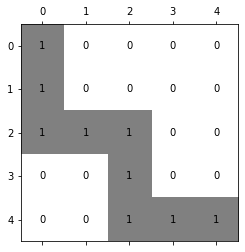

In [9]:
# drawing a matrix to show the shortest path and the graphs for the model

OBJ = solvingMaze()
numberofRows = int(input("Enter the size of the Matrix "))

matrixcomponent = np.array([[1,9,1,1,1],
                              [1,9,1,9,1],
                              [1,1,1,9,1],
                              [9,9,9,9,1],
                              [9,9,9,9,1]])
#matrixcomponent = OBJ.showmatrix(numberofRows)


selectOfAlgorithm = int(input("Choose the Algorithm mode , Enter 1 for Heuristic Algorithm or 2 for dijikstra's to select"))
modeofGame = int(input("Choose the game mode , Enter 1 or 2 to select"))
#cost = 0
#path = np.zeros((numberofRows,numberofRows), dtype = np.int8)
#call the heuristic algorithm based on the selection
if selectOfAlgorithm == 1:                   
        hr = Heuristic()
        result = hr.heuristicpath(matrixcomponent , numberofRows,modeofGame)
        path , cost, tm = result
        
else:
        modeofGame =Dijikstra()
        result = modeofGame.dijkstrapath(matrixcomponent,numberofRows,modeofGame)
        path, cost, tm = result
OBJ.visualizepath(path)

                  




In [37]:
## Plotting of Heuristic and Dijikstra Alogrithm based on the game modes for different criterias and analyse the result

## 1. Cost Vs Size of Matrix

## 2. Cost difference Vs Size of Matrix

## 3. Time difference Vs Size of Matrix


class statistical_analysis:
    def costVSsizeofMatrix(self,distribution,n):

        heuristic = Heuristic()
        dijkstra = Dijikstra()
        cellheuristic = [[],[]]
        celldijkstra = [[],[]]
        costheuristic = [[],[]]
        costdijkstra = [[],[]]
        timeheuristic = [[],[]]
        timedijkstra = [[],[]]
        costdifference = [[],[]]
        celldifference = [[],[]]
        timedifference = [[],[]]
        for mode in range(2):
            for i in range(1,n):
                if distribution == "random":
                     data = np.random.randint(i, size = (5,5))
                     parameter = "Range"
                if distribution == "uniform":
                    data = uniform.rvs(size=(5,5), loc = 0, scale= i )
                    parameter = "Range"
                if distribution == "normal":
                    data = uniform.rvs(size=(5,5), loc = 0, scale=i )
                    parameter = "Range"
                if distribution == "gamma":
                    data = gamma.rvs(a=i, size=(5,5))
                    parameter = "Range"
                if distribution == "exponential":
                    data = expon.rvs(scale=i,loc=0,size=(5,5))
                    parameter = "Range"
                if distribution == "poisson":
                    data = poisson.rvs(mu=i, size=(5,5))
                    parameter = "MU"
                if distribution == "binomial":
                    data = binom.rvs(n=i,p=0.5,size=(5,5))
                    parameter = "Range"
                
                ph,ch,th = heuristic.heuristicpath(data, 5,mode + 1)
                #ph,ch = heuristic.heuristicpath(data, i,mode + 1)
                
                
                pd,cd,td = dijkstra.dijkstrapath(data,5,mode + 1)
                cellheuristic[mode].append(np.sum(ph))
                celldijkstra[mode].append(np.sum(pd))
                costheuristic[mode].append(ch)
                costdijkstra[mode].append(cd)
                timeheuristic[mode].append(th)
                timedijkstra[mode].append(td)
                costdifference[mode].append(ch - cd)
                celldifference[mode].append(abs(np.sum(ph) - np.sum(pd)))
                timedifference[mode].append(abs(th - td))
           
            
            if mode == 0:
                print("Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for ",distribution + " distribution.")  
            print("For game mode :",mode + 1)
            plt.figure(figsize=(8,8))    
            plt.plot(range(1,n),costheuristic[mode], label = "heuristic")
            plt.plot(range(1,n),costdijkstra[mode], label = "dijkstra")
            plt.xlabel(parameter)
            plt.xticks(range(1,n))
            plt.ylabel('Cost')
            plt.legend()
            name=str("CostVsSize")+"_"+str(distribution)

            full_path = os.path.join(desired_folder, name)
            plt.savefig(name)

            plt.show()
           
           
            
            #if mode == 100:
            if mode == 0:
                print("Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for ",distribution + " distribution.")  
                print("For game mode :",mode + 1)
                plt.figure(figsize=(8,8))    
                plt.plot(range(1,n),costdifference[mode])
                plt.xlabel('Size of maze')
                plt.ylabel('Costdifference between heuristic and dijkstra algorithms')

                plt.show()
            
                if mode == 0:
                    print("Heuristic algorithm & Dijkstra algorithm timedifference VS the size of matrix for ",distribution + " distribution.")  
                print("For game mode :",mode + 1)
                plt.figure(figsize=(8,8))    
                plt.plot(range(1,n),timedifference[mode])
                plt.xlabel('Size of maze')
                plt.ylabel('timedifference between heuristic and dijkstra algorithms')

                plt.show()

                if mode == 0:
                    print("Heuristic algorithm & Dijkstra algorithm celldifference VS the size of matrix for ",distribution + " distribution.")  
                print("For game mode :",mode + 1)
                plt.figure(figsize=(8,8))    
                plt.plot(range(1,n),celldifference[mode])
                plt.xlabel('Size of maze')
                plt.ylabel('celldifference between heuristic and dijkstra algorithms')

                plt.show()
        
        
        return cellheuristic,celldijkstra ,costheuristic ,costdijkstra,timeheuristic ,timedijkstra ,costdifference ,celldifference ,timedifference
            
            
            
            

   





In [38]:

# https://www.datacamp.com/community/tutorials/probability-distributions-python - is the source for different probablity of the graph
# these are standard format for the distributions  which are taken from the sourve

costheuristic = [[],[]]
costdijkstra =  [[],[]]
costdifference = [[],[]]

class unvscost:
    def unanalysisonrange(self,n_of_i):
        data = uniform.rvs(size=(5,5), loc = 0, scale= 5*(i+1))
        plotdistribution(data_distribution,"UNIFORM Distribution")
    def unstdvariance(self, n_of_i):
        data_distribution = uniform.rvs(size=(5,5), loc = 0, scale= 10)
        plotdistribution(data_distribution,"UNIFORM Distribution")

class gammavscost:            
    def gammastdvariance(self, n_of_i):
        data_distribution = gamma.rvs(a = i + 1, size=(5,5))
        plotdistribution(data_distribution,"Gamma Distribution")
class expvscost:            
    def expstdvariance(self, n_of_i):
        data_distribution = data = expon.rvs(scale=1,loc=0,size=(5,5))
        plotdistribution(data_distribution,"Exponential Distribution")
            
class poissonvscost:            
    def poissonstdvariance(self, n_of_i):
        data_distribution = poisson.rvs(mu=3, size=(5,5))
        plotdistribution(data_distribution,"Poisson Distribution")
                   
class binomvscost:            
    def binomstdvariance(self, n_of_i):
        data_distribution = binom.rvs(n=10,p=0.8,size=(5,5))
        plotdistribution(data_distribution,"BINOMIAL Distribution")
    

In [39]:

class Distributionplotting:
    def plotdistribution(self,data_distribution,distributionName):
        heuristic = Heuristic()
        dijkstra = Dijikstra()
        costheuristic = [[],[]]
        costdijkstra =  [[],[]]
        costdifference = [[],[]]
        for mode in range(2):
            for i in range(n_of_i):
                data = uniform.rvs(size=(5,5), loc = 0, scale= 5*(i+1))
                ph,ch,th = heuristic.heuristicpath(data, 5,mode + 1)#returns cost, time and path of heuristic
                pd,cd,td = dijkstra.dijkstrapath(data,5,mode + 1)#returns cost, time and path of dijkstra's
                costheuristic[mode].append(ch)
                costdijkstra[mode].append(cd)
                costdifference[mode].append(ch - cd)# cost difference b/w heuristic and dijkstra's between choosen game mode
                #plot graph for cost difference
            if mode == 0:
                print("Heuristic algorithm & Dijkstra algorithm cost for uniform distribution.")  
            print("For game mode :",mode + 1)
            plt.figure(figsize=(10,8))    
            plt.plot(range(0,n_of_i),costheuristic[mode], label = "heuristic")
            plt.plot(range(0,n_of_i),costdijkstra[mode], label = "dijkstra")
            plt.xticks(range(0,n_of_i))
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')
            
            plt.legend()
            plt.show()



    def plotstdvariancedistribution(self,data_distribution,distributionName):
        heuristic = Heuristic()
        dijkstra = Dijikstra()
        costheuristic = [[],[]]
        costdijkstra =  [[],[]]
        costdifference = [[],[]]
        stdvh = [[],[]]
        meanh = [[],[]]
        varh = [[],[]]
        stdvd = [[],[]]
        meand = [[],[]]
        vard = [[],[]]
        for mode in range(2):
            for i in range(n_of_i):
                #data = gamma.rvs(a = i + 1, size=(5,5))
                data = data_distribution
                ph,ch,th = heuristic.heuristicpath(data, 5,mode + 1)
                pd,cd,td = dijkstra.dijkstrapath(data,5,mode + 1)
                costheuristic[mode].append(ch)
                costdijkstra[mode].append(cd)
                costdifference[mode].append(ch - cd)
            #calculate the mean, variance and std for heuristic and dijkstra's
            #calculate the difference the diifference
            if mode == 0:
                print("Heuristic algorithm & Dijkstra algorithm cost for gamma distribution.") 
                stdvh[mode] = np.std(costheuristic[mode])
                meanh[mode] = np.mean(costheuristic[mode])
                varh[mode] = np.var(costheuristic[mode])
                stdvd[mode] = np.std(costdijkstra[mode])
                meand[mode] = np.mean(costdijkstra[mode])
                vard[mode] = np.var(costdijkstra[mode])
            else:
                stdvh[mode] = np.std(costheuristic[mode])
                meanh[mode] = np.mean(costheuristic[mode])
                varh[mode] = np.var(costheuristic[mode])
                stdvd[mode] = np.std(costdijkstra[mode])
                meand[mode] = np.mean(costdijkstra[mode])
                vard[mode] = np.var(costdijkstra[mode])
        print("For game mode :",mode + 1)
        print("For heuristic:")
        print("Mean of cost is ", meanh[mode], " Standard deviation is ", stdvh[mode], " Variance is ", varh[mode])
        print("For dijkstra:")
        print("Mean of cost is ", meand[mode], " Standard deviation is ", stdvd[mode], " Variance is ", vard[mode])
        #print("hello")
        plt.figure(figsize=(20,10))    
        plt.plot(range(0,n_of_i),costheuristic[mode], label = "heuristic")
        plt.plot(range(0,n_of_i),costdijkstra[mode], label = "dijkstra")
        plt.xticks(range(0,n_of_i))
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')

        plt.legend()
        plt.show()


## Size of the matrix vs cost on different distribution

Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  random distribution.
For game mode : 1


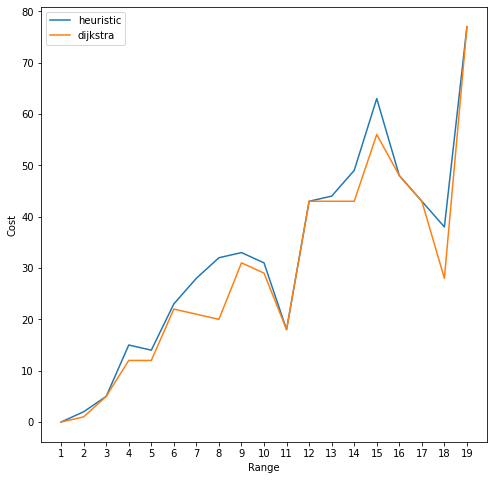

Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for  random distribution.
For game mode : 1


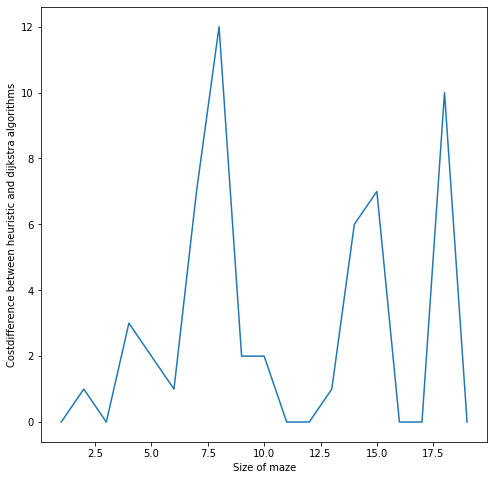

Heuristic algorithm & Dijkstra algorithm timedifference VS the size of matrix for  random distribution.
For game mode : 1


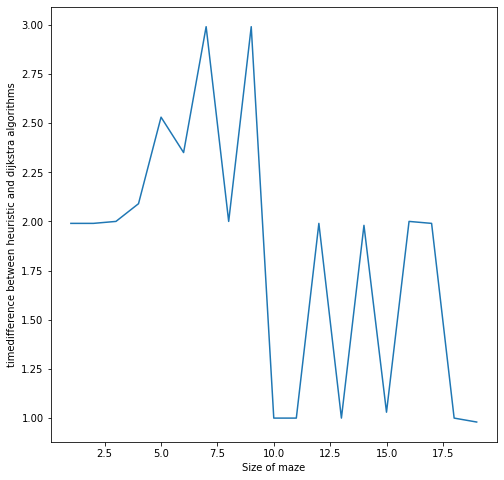

Heuristic algorithm & Dijkstra algorithm celldifference VS the size of matrix for  random distribution.
For game mode : 1


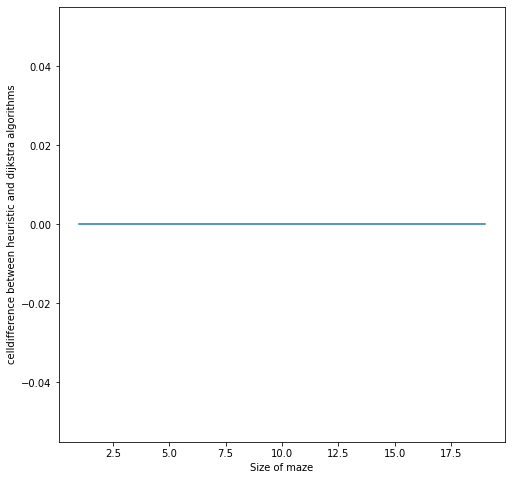

For game mode : 2


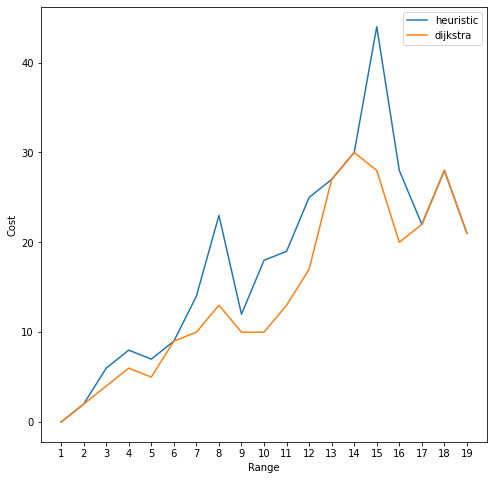

([[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[0, 2, 5, 15, 14, 23, 28, 32, 33, 31, 18, 43, 44, 49, 63, 48, 43, 38, 77],
  [0, 2, 6, 8, 7, 9, 14, 23, 12, 18, 19, 25, 27, 30, 44, 28, 22, 28, 21]],
 [[0, 1, 5, 12, 12, 22, 21, 20, 31, 29, 18, 43, 43, 43, 56, 48, 43, 28, 77],
  [0, 2, 4, 6, 5, 9, 10, 13, 10, 10, 13, 17, 27, 30, 28, 20, 22, 28, 21]],
 [[0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.01],
  [0.0,
   0.99,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]],
 [[1.99,
   1.99,
   2.0,
   2.09,
   2.53,
   2.35,
   2.99,
   2.0,
   2.99,
   1.0,
   1.0,
   1.99,
   1.0,
   1.98,
   1.03,
   2.0,
   

In [40]:
st = statistical_analysis()
st.costVSsizeofMatrix("random",20)




Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  uniform distribution.
For game mode : 1


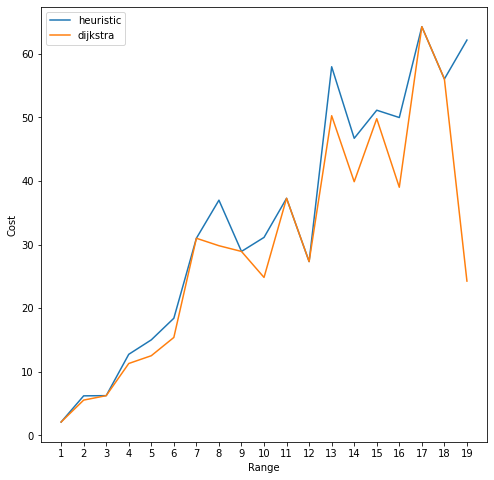

For game mode : 2


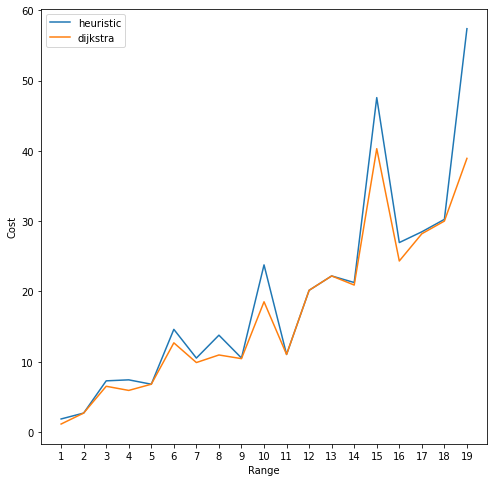

([[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9]],
 [[2.099139239456667,
   6.217631086396276,
   6.247908492684544,
   12.749594919197023,
   15.022413384172749,
   18.422016707269528,
   31.000242716409247,
   36.98958268384933,
   28.928591146702665,
   31.13619372250344,
   37.285594464657414,
   27.333200401482763,
   57.9764550158352,
   46.71974847175094,
   51.13978978935326,
   49.98786285688382,
   64.27623241150852,
   56.048745846946574,
   62.1737703615786],
  [1.849872559862674,
   2.6881881131899537,
   7.2729664165627135,
   7.415637696254818,
   6.793291049263898,
   14.599813501757986,
   10.514231299467243,
   13.77169149402042,
   10.522935131821898,
   23.77237989338034,
   11.02970869029782,
   20.155545029126305,
   22.19976290591351,
   21.26243611342087,
   47.5726301

In [12]:
st.costVSsizeofMatrix("uniform",20)


Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  gamma distribution.
For game mode : 1


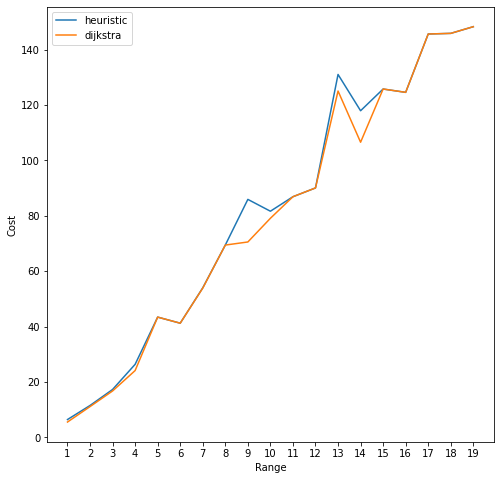

Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for  gamma distribution.
For game mode : 1


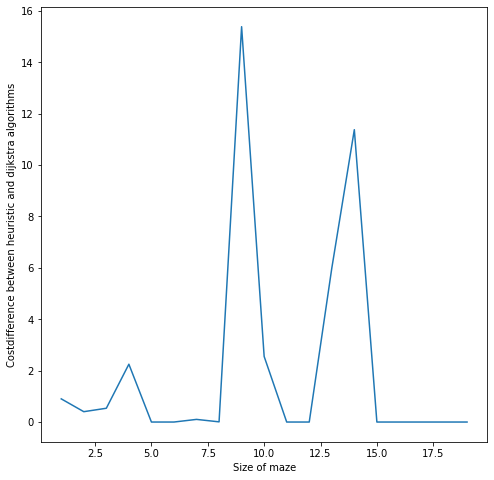

Heuristic algorithm & Dijkstra algorithm timedifference VS the size of matrix for  gamma distribution.
For game mode : 1


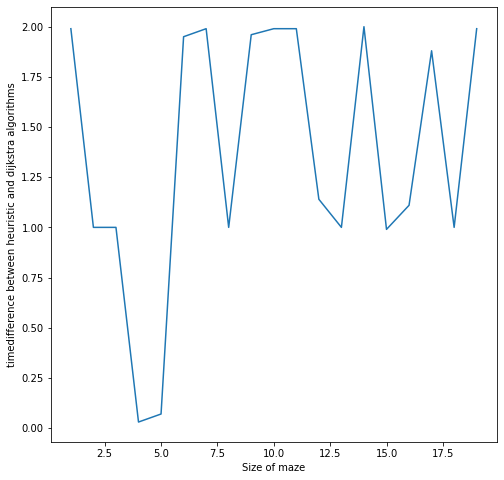

Heuristic algorithm & Dijkstra algorithm celldifference VS the size of matrix for  gamma distribution.
For game mode : 1


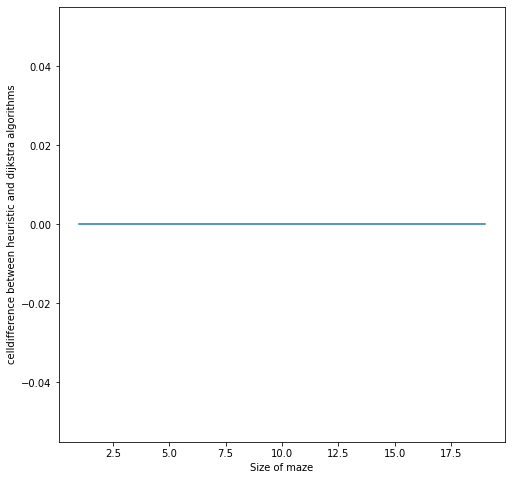

For game mode : 2


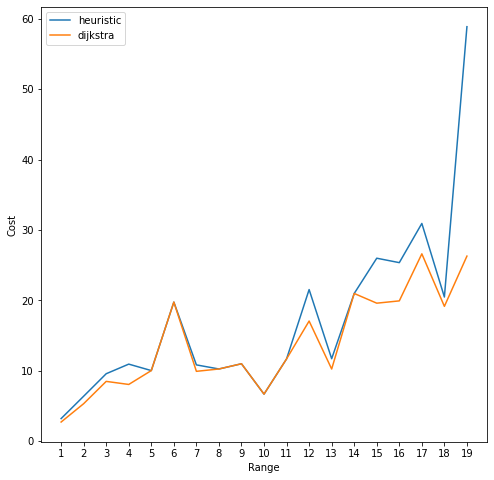

([[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[6.396993773466437,
   11.474149676677524,
   17.25573702431938,
   26.34386463736681,
   43.40182455646268,
   41.201977693499884,
   53.98444764739235,
   69.43708345347544,
   85.93234034004259,
   81.65948783558845,
   86.89577415692051,
   90.0687399047481,
   131.06963183156495,
   117.96016213085038,
   125.80388491423727,
   124.60425582208775,
   145.6842881484137,
   145.91149743346244,
   148.32554620645843],
  [3.1972439533556063,
   6.375572678075299,
   9.569680203749748,
   10.934024520482085,
   10.016637015021647,
   19.745582325914352,
   10.825972577137446,
   10.244148441805445,
   10.986561134900823,
   6.673069226221916,
   11.67530232316895,
   21.523835494962483,
   11.704837839459204,
   20.969857080172435,
   25.9812

In [24]:
st.costVSsizeofMatrix("gamma",20)


Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  poisson distribution.
For game mode : 1


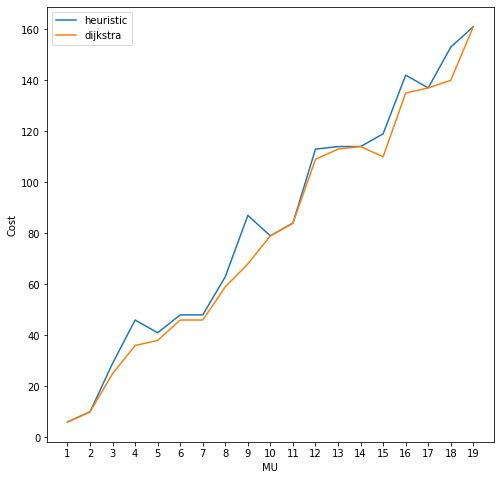

Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for  poisson distribution.
For game mode : 1


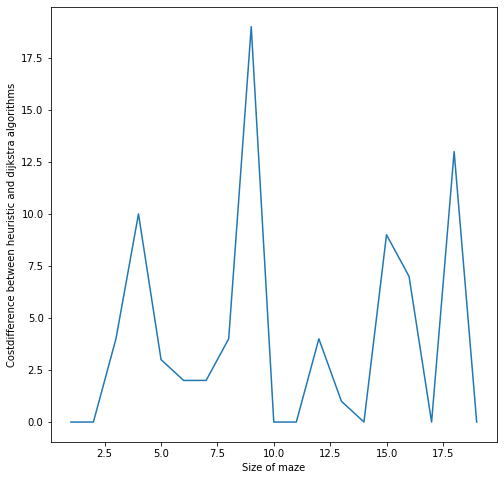

Heuristic algorithm & Dijkstra algorithm timedifference VS the size of matrix for  poisson distribution.
For game mode : 1


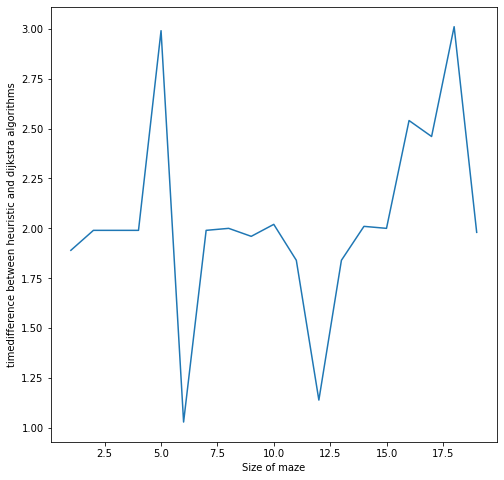

Heuristic algorithm & Dijkstra algorithm celldifference VS the size of matrix for  poisson distribution.
For game mode : 1


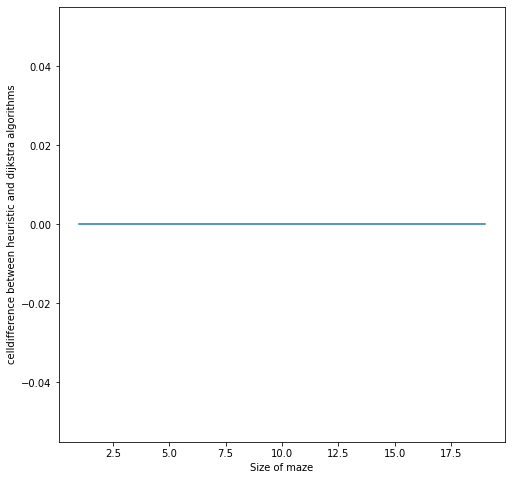

For game mode : 2


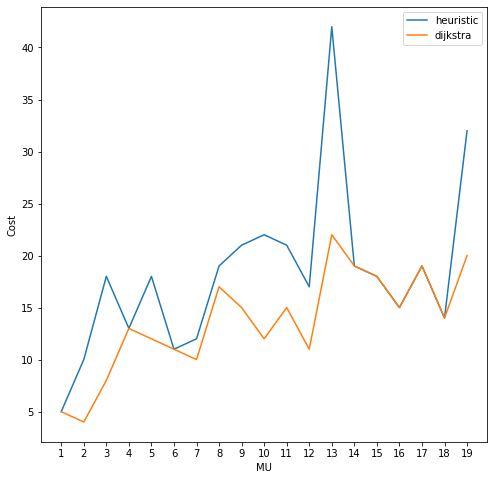

([[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[6,
   10,
   29,
   46,
   41,
   48,
   48,
   63,
   87,
   79,
   84,
   113,
   114,
   114,
   119,
   142,
   137,
   153,
   161],
  [5, 10, 18, 13, 18, 11, 12, 19, 21, 22, 21, 17, 42, 19, 18, 15, 19, 14, 32]],
 [[6,
   10,
   25,
   36,
   38,
   46,
   46,
   59,
   68,
   79,
   84,
   109,
   113,
   114,
   110,
   135,
   137,
   140,
   161],
  [5, 4, 8, 13, 12, 11, 10, 17, 15, 12, 15, 11, 22, 19, 18, 15, 19, 14, 20]],
 [[0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]],
 [[1.89

In [25]:
st.costVSsizeofMatrix("poisson",20)


Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  exponential distribution.
For game mode : 1


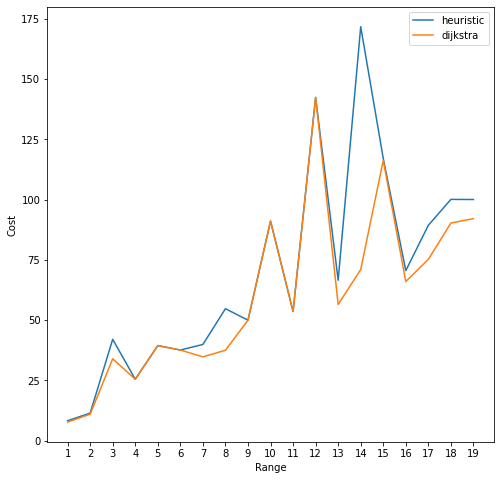

Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for  exponential distribution.
For game mode : 1


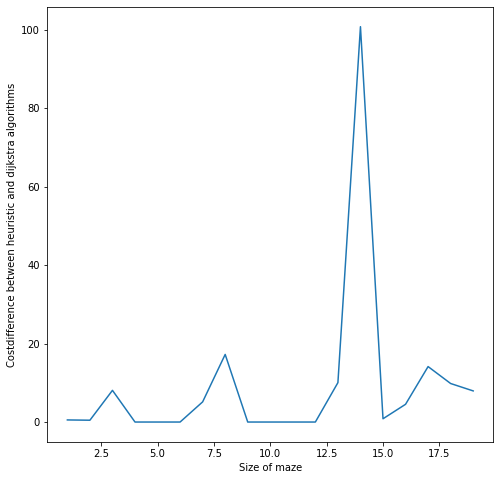

Heuristic algorithm & Dijkstra algorithm timedifference VS the size of matrix for  exponential distribution.
For game mode : 1


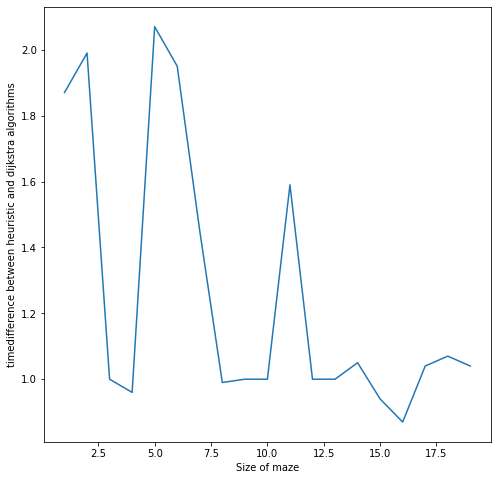

Heuristic algorithm & Dijkstra algorithm celldifference VS the size of matrix for  exponential distribution.
For game mode : 1


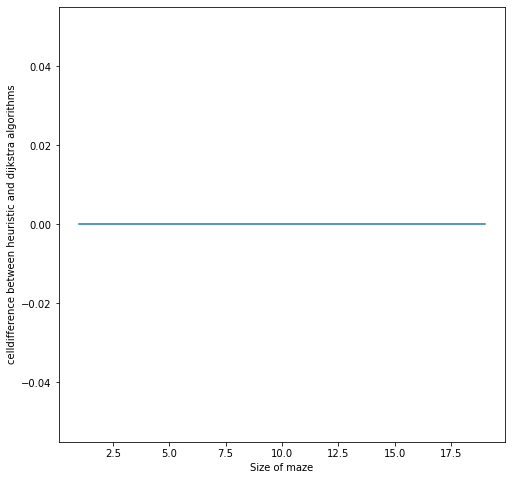

For game mode : 2


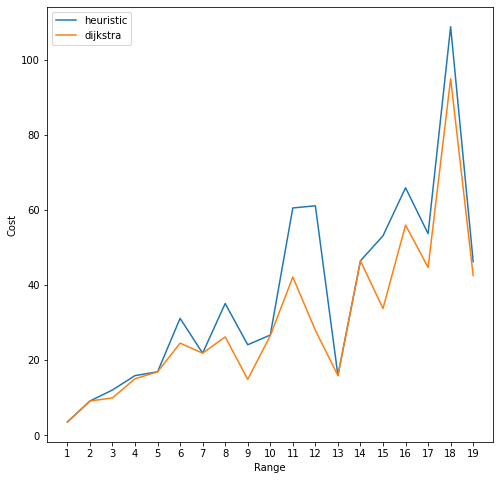

([[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[8.231175887090266,
   11.399343094386202,
   42.00440825569658,
   25.446400025857397,
   39.41352840738091,
   37.56109772639112,
   39.86907568203454,
   54.70062590731916,
   49.94409727317174,
   91.0418978537889,
   53.53571265574823,
   142.3543838676327,
   66.5004248411469,
   171.68592154800342,
   117.06174509609097,
   70.50303690808175,
   89.30634633676857,
   100.04922312903842,
   99.99557953033265],
  [3.5268725769309475,
   9.117647490625533,
   12.057523335416814,
   15.888429896548285,
   16.8933403283652,
   31.126411435408674,
   21.866013803441597,
   35.08538701566717,
   24.099943053656414,
   26.688361565532553,
   60.52609773741942,
   61.101043677085585,
   15.920404197199321,
   46.446951820340004,
   53.119080177

In [26]:
st.costVSsizeofMatrix("exponential",20)


Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  binomial distribution.
For game mode : 1


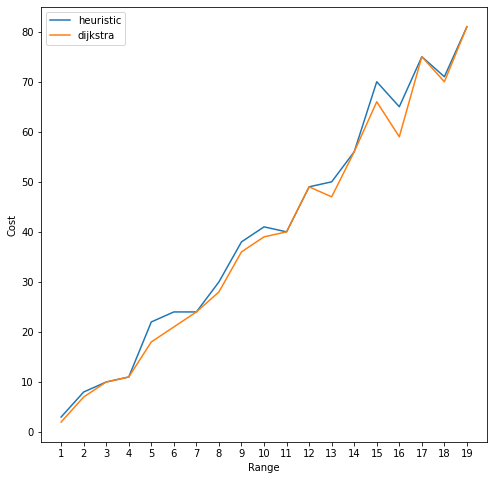

Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for  binomial distribution.
For game mode : 1


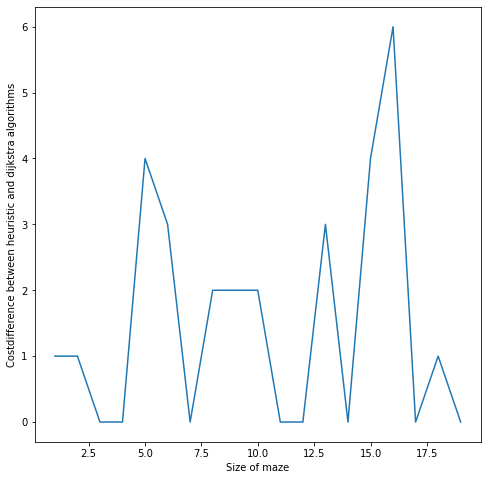

Heuristic algorithm & Dijkstra algorithm timedifference VS the size of matrix for  binomial distribution.
For game mode : 1


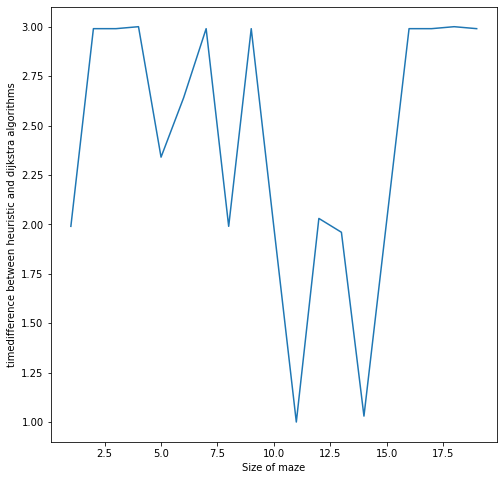

Heuristic algorithm & Dijkstra algorithm celldifference VS the size of matrix for  binomial distribution.
For game mode : 1


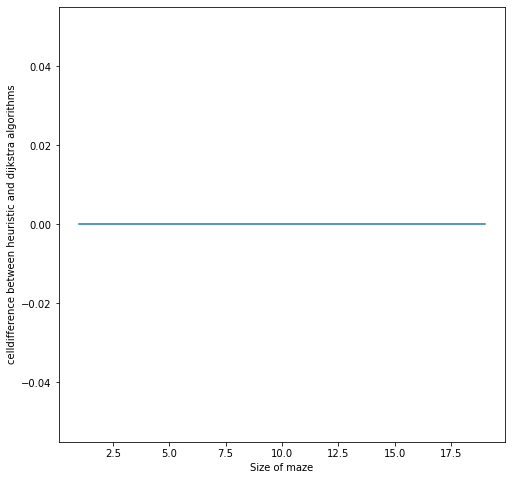

For game mode : 2


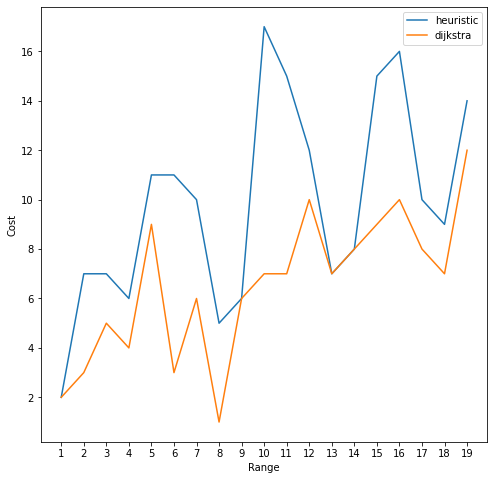

([[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],
 [[3, 8, 10, 11, 22, 24, 24, 30, 38, 41, 40, 49, 50, 56, 70, 65, 75, 71, 81],
  [2, 7, 7, 6, 11, 11, 10, 5, 6, 17, 15, 12, 7, 8, 15, 16, 10, 9, 14]],
 [[2, 7, 10, 11, 18, 21, 24, 28, 36, 39, 40, 49, 47, 56, 66, 59, 75, 70, 81],
  [2, 3, 5, 4, 9, 3, 6, 1, 6, 7, 7, 10, 7, 8, 9, 10, 8, 7, 12]],
 [[0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.13]],
 [[1.99,
   2.99,
   2.99,
   3.0,
   2.34,
   2.64,
   2.99,
   2.99,
   2.99,
   1.99,
   1.0,
   2.03,
   1.96,
   1.03,
   2.01,
   2.99,
   2.99,
  

In [27]:
st.costVSsizeofMatrix("binomial",20)